In [1]:
# Import the required libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def plot_etfs_comparison(tickers, start_date, end_date):
    """
    Plot the adjusted closing prices of multiple ETFs over a given period.

    Parameters:
    tickers (list): List of ETF tickers (e.g., ['DOW', 'DOG']).
    start_date (str): Start date in 'YYYY-MM-DD' format.
    end_date (str): End date in 'YYYY-MM-DD' format.
    """
    # Download historical data for the tickers
    data = yf.download(tickers, start=start_date, end=end_date, progress=False)

    # Ensure 'Adj Close' or 'Close' column exists
    if "Adj Close" in data.columns:
        data = data["Adj Close"]
    elif "Close" in data.columns:
        data = data["Close"]
    else:
        raise KeyError("Neither 'Adj Close' nor 'Close' columns found in the data.")

    # Normalize prices to start at 100 for better comparison
    normalized_data = (data / data.iloc[0]) * 100

    # Plot the normalized data
    plt.figure(figsize=(12, 6))
    for ticker in tickers:
        plt.plot(normalized_data[ticker], label=ticker)

    # Add title, labels, legend, and grid
    plt.title("DOW vs. DOG Performance Comparison (2024)", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Normalized Price (Base = 100)", fontsize=14)
    plt.legend(tickers, fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

In [3]:
# Set the tickers and time range
tickers = ["DOW", "DOG"]
start_date = "2024-01-01"
end_date = "2024-12-31"

In [4]:
# Download and inspect the data structure
data = yf.download(tickers, start=start_date, end=end_date, progress=False)
print(data.head())
print("Columns available:", data.columns)

Price           Close                  High                   Low             \
Ticker            DOG        DOW        DOG        DOW        DOG        DOW   
Date                                                                           
2024-01-02  28.109297  52.438328  28.279714  52.770035  28.061958  51.732261   
2024-01-03  28.327053  51.774914  28.355457  52.201396  28.194507  51.130452   
2024-01-04  28.336519  51.357906  28.336519  52.116099  28.128231  51.220484   
2024-01-05  28.327053  51.954979  28.431197  52.154003  28.213441  51.158879   
2024-01-08  28.166103  52.201397  28.497470  52.258259  28.166103  51.547456   

Price            Open              Volume           
Ticker            DOG        DOW      DOG      DOW  
Date                                                
2024-01-02  28.270246  51.879162  1130300  3533500  
2024-01-03  28.222909  51.983414   863000  4120000  
2024-01-04  28.298648  51.746479   744900  4579500  
2024-01-05  28.355457  51.206265   875400

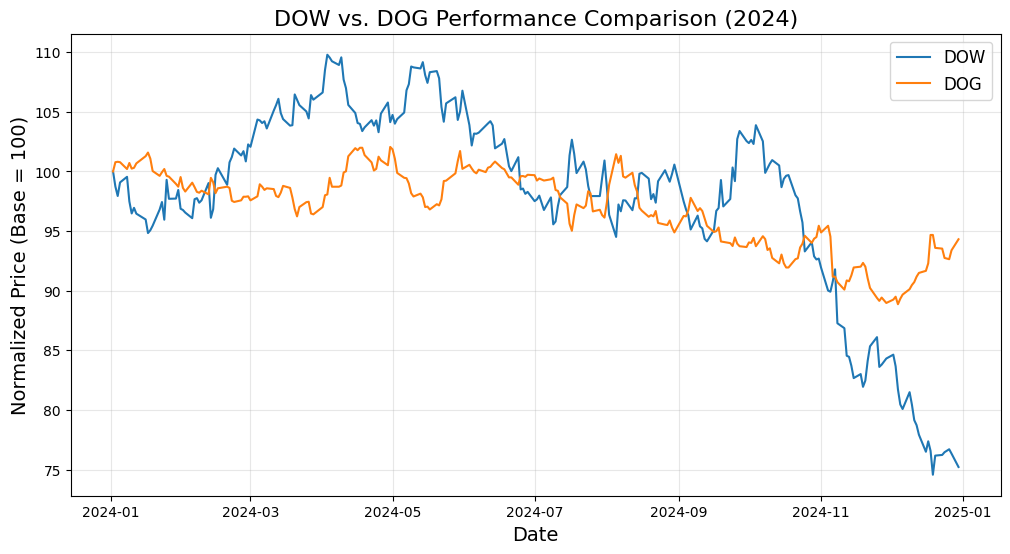

In [5]:
# Call the function to plot the comparison
plot_etfs_comparison(tickers, start_date, end_date)